<a href="https://colab.research.google.com/github/yje0515/PythonStudy2025/blob/main/05_05_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MBC 마켓에서 신상품으로 캔 와인을 판매하려고 한다.
# 주류는 온라인 판매가 안되서 온라인 예약 후에
# 오프라인 매장에서 구매를 유도하려고 함

# 입고된 와인을 보니 레드와인인지 화이트와인인지 구분 표시가 안되어있음
# 캔에 인쇄된 알콜도수, 당도 , PH값으로 와인 종류를 구별해ㅂ자.

# 품질 확인용으로 뜯은 캔이 테스트용으로 있고 이것을 데이터로 활용
# 로지스틱 회귀 모델로 적용을 해서 알아보자

In [1]:
# 와인의 특성화된 데이터 삽입
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()
# 알콜, 당도, 산도, 클래스(target 0 : 레드와인, target 1 : 화이트와인)
# 데이터에서 화이트와인이 양성클래스로 화이트와인을 표시하는 문제

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()
# 결과 6497개의 샘플 4열 ( 실수형 )
# Non-Null : 누락된 값이 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe() # 열에 대한 통계
# mean : 평균, std : 표준편차, min : 최소
# 25% =1사분위수, 50%=중간값(2사분위), 75%-3사분위, max=(100%,4사분위)
# 사분위수 : 데이터를 순서대로 4등분한 값

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
# StandardScaler 클래스로 특성을 표준화 해야함
data = wine[['alcohol','sugar','pH']].to_numpy() # 넘파이 배열로 변환
target = wine['class'].to_numpy() # class 열을 넘파이배열로 변환하여 target 배열에 저장
print(data)

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]]


In [6]:
print(target)

[0. 0. 0. ... 1. 1. 1.]


In [7]:
# 훈련세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(data,target,test_size=0.2,random_state=42)
# 설정값을 지정하지 않으면 25%를 테스트 세트로 지정
# test_size = 0.2 를 이용해서 20%를 테스트 세트로 지정
print(train_input.shape,test_input.shape) # 5197개 훈련데이터, 1300개 테스트 데이터 3개 특성

(5197, 3) (1300, 3)


In [13]:
# 훈련세트 표준점수로 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input) # 훈련시작
train_scaled = ss.transform(train_input) # 훈련데이터 변환
test_scaled = ss.transform(test_input) # 테스트 데이터 변환
print(train_scaled)
print('-'*40)
print(test_scaled)

[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 ...
 [-0.82568214  0.0267578   0.14437512]
 [-0.82568214  0.52716215 -0.23153545]
 [-0.82568214 -0.57789745  1.83597265]]
----------------------------------------
[[ 1.44082714  1.52797084  0.26967864]
 [-0.48990299 -0.68214836  0.3323304 ]
 [ 1.27293756  0.40206106 -0.23153545]
 ...
 [ 1.60871671 -0.76554908 -0.16888369]
 [-0.90962693  0.88161523  0.52028568]
 [-1.49724045  2.09092573 -1.98578474]]


In [14]:
# 로지스틱회귀 ( 다른것도 사용 가능 )
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target)) # 78.08%
print(lr.score(test_scaled,test_target)) # 77.76%
# -> 80% 이하 ( 과소적합 )

0.7808350971714451
0.7776923076923077


In [15]:
# 제출용 보고서를 만들어보자
print(lr.coef_,lr.intercept_) # 로지스틱회귀 (계수 = 가중치, 절편 = 더해지는 값)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [ ]:
# 알콜 도수값에 0.51268071를 곱하고,
# 당도에 1.67335441를 곱하고,
# pH값에 -0.68775646을 곱한 다음 모두 더함
# 위에 나온 값에 절편 1.81773456을 더함
# 이값이 0보다 크면 화이트 와인, 작으면 레드와인
# 현재 77% 정도 정확히 화이트 와인으로 분류 완료!!!!

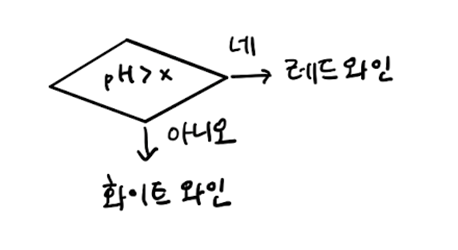

In [17]:
# 결정트리 : 이유를 설명하기 쉽다
# if문 사용과 유사
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 모델로 훈련
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target) # 훈련 시작
print(dt.score(train_scaled,train_target)) # 99.69% 과대적합
print(dt.score(test_scaled,test_target))   # 85.92%

0.996921300750433
0.8592307692307692


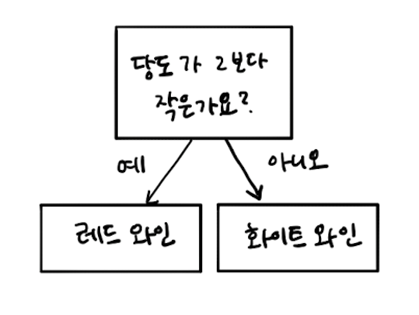

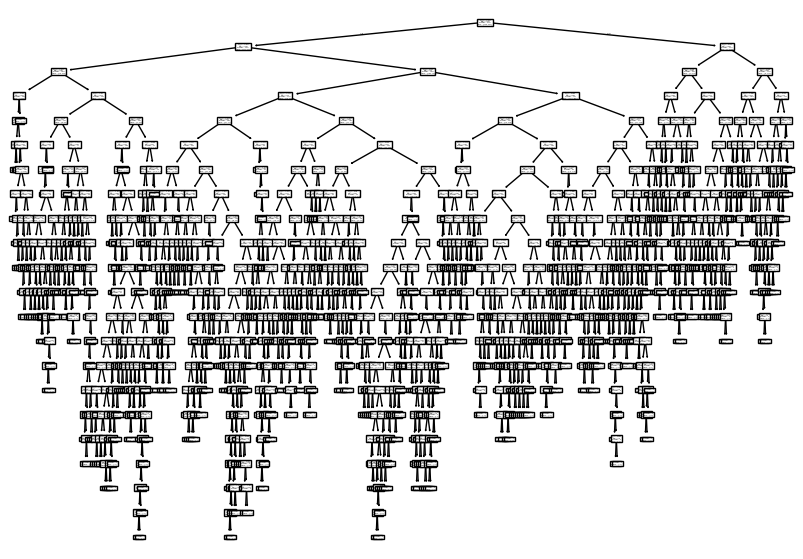

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7)) # figure(형태,도형) (가로인치,세로인치)
plot_tree(dt)
plt.show()
# 맨 위 노드: root 노드, 맨 아래 노트 : leaf 노드

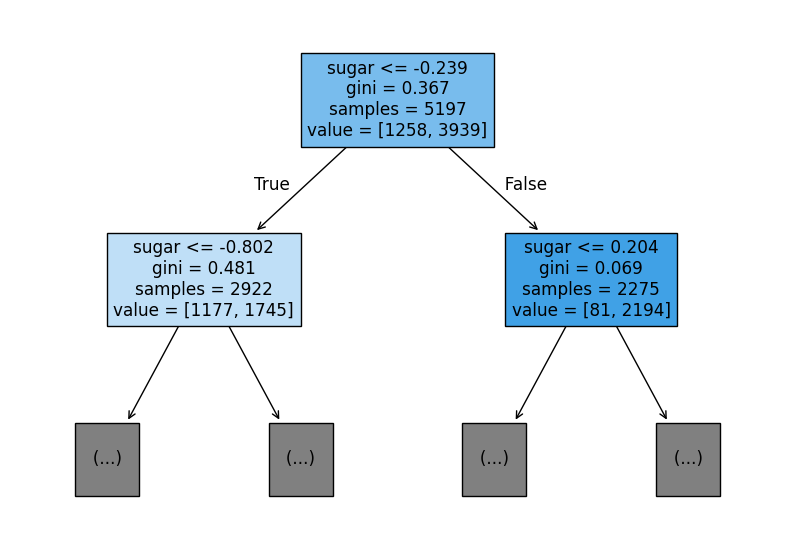

In [24]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','sugar','pH'])
         #  루트노드제외,    색칠
plt.show()

In [ ]:
# sugar -0.239 이상이면 False(red wine)
# 같거나 작으면 True(white wine)
# 총 샘플 수는 5197개, 음성클래스(레드와인) 1256개, 양성클래스(화이트와인) 3939개
    # 아래쪽 노드의 왼쪽 노드를 살펴보자
    # 이 노드는 당도가 더 낮은지를 물어보는 노드(-0.802)
    # 당도가 -0.802와 같거나 낮다면(True) 다시 왼쪽으로
    # 그렇지 않으면(False) 오른쪽으로 이동, 음성클래스 1177개, 양성클래스 1745개
    # 오른쪽 노드를 보면 음성클래스 81개, 양성클래스 2194개
    # 대부분의 화이트와인 샘플이 이 노드로 이동함
# gini = 0.367 (불순도) 애매한거
# sample = 5197 (총 샘플 수)
# value = (1256(1),3939(0))

# 노드의 바탕색을 유심히 보면 오른쪽 노드가 루트노드보다 더 진하고, 왼쪽 노드는 연함
# filled = True 로 지정하면 클래스마다 색을 지정하고, 비율이 높아지면 점점 진하게 표시한다.

# 결정트리에서 예측하는 방법은 간단한데, 리프노드에서 가장 많은 클래스가 예측클래스가 됨
# 만약 이 결정트리로 성장을 멈춘다면 왼쪽 노드에 도달한 샘플과
# 오른쪽 노드에 도달한 샘플은 모두 양성클래스로 예측된다( 양성클래스가 많아서)
# gini 불순도로 노드에서 데이터를 분할할 기분을 정하는 값

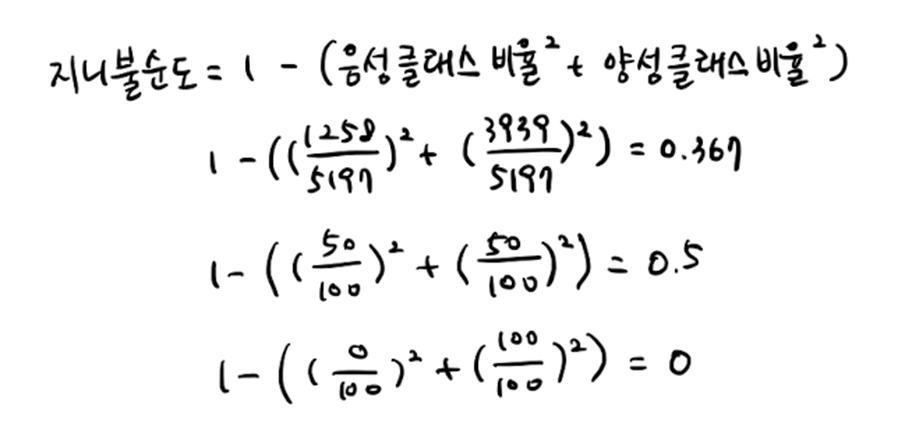

In [25]:
# 가지치기
# 가지치기를 하지 않으면 무작정 끝까지 자라나는 트리를 만듦
# 트리의 깊이( depth )를 지정하면 된다.

# 새로운 객체를 깊이 3으로 만든다
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target) # 훈련

print(dt.score(train_scaled,train_target)) # 84.54%
print(dt.score(test_scaled,test_target))   # 84.15%

0.8454877814123533
0.8415384615384616


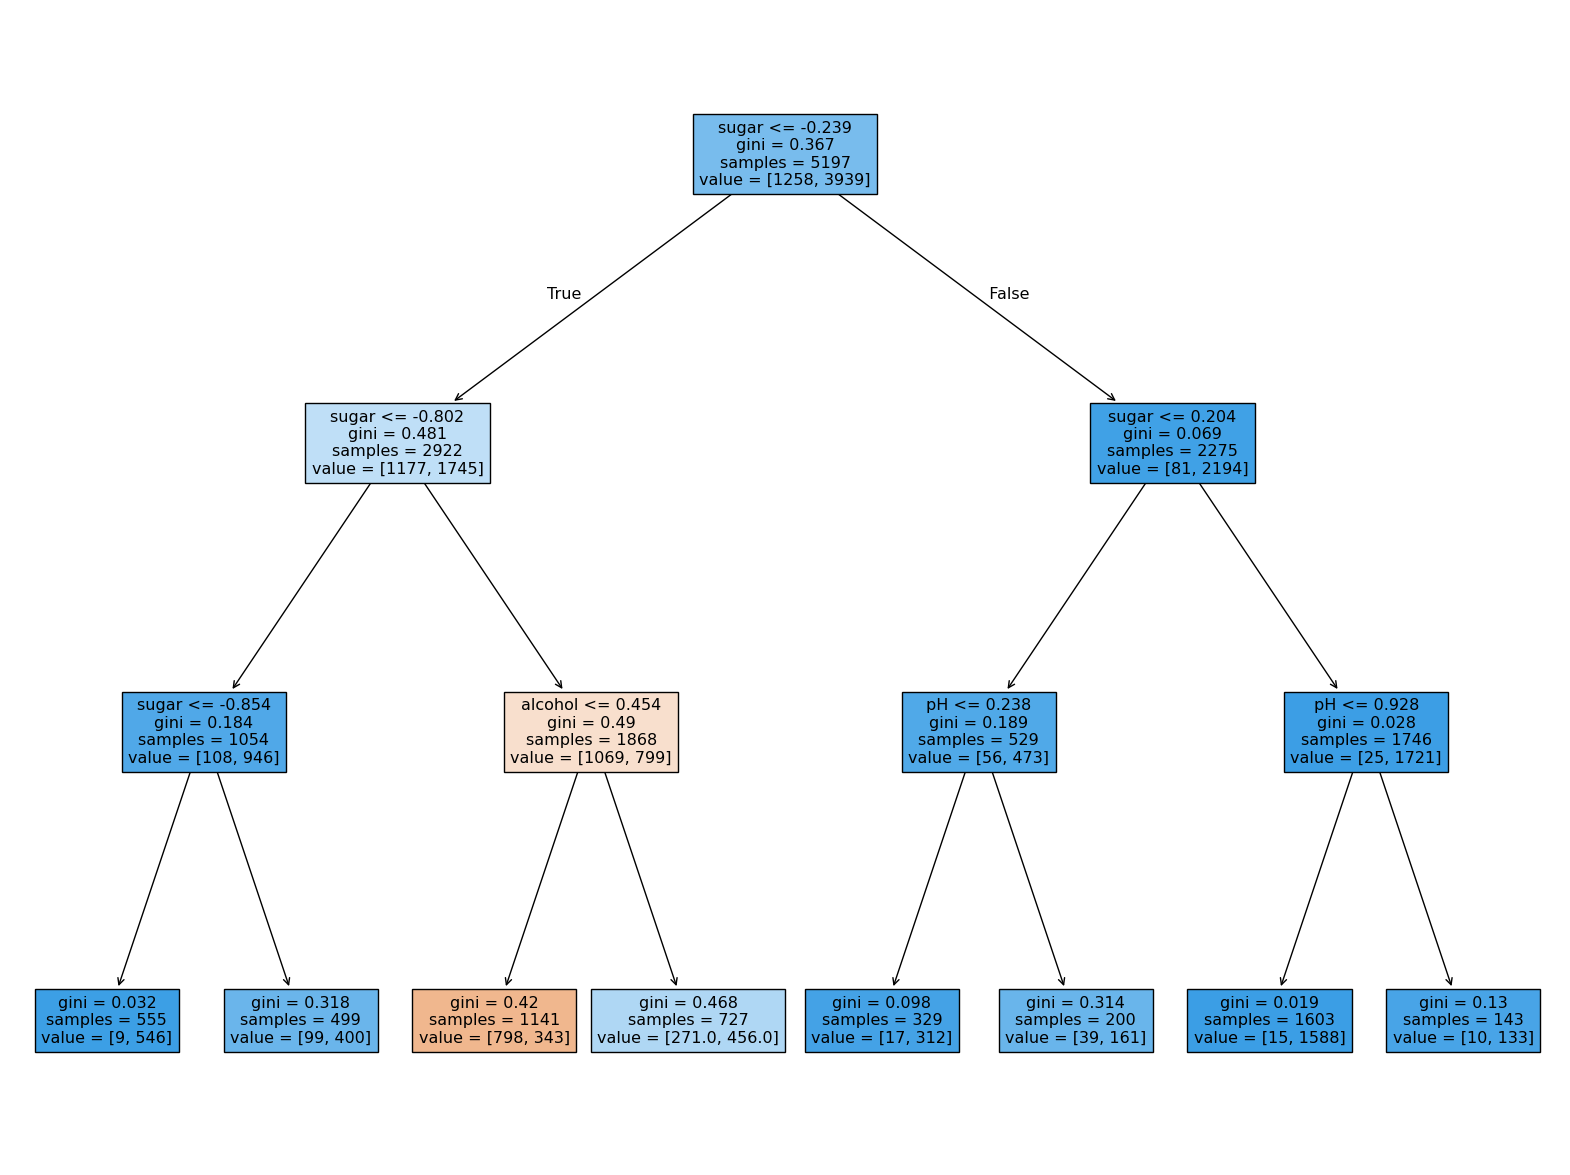

In [26]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [27]:
# 그래프 분석
# 루트노드(depth=0) 다음 깊이에 있는 depth=1 노드는 모두 당도를 기준으로 훈련세트를 나눔
# 하지만 depth=2에서는 맨 왼쪽 노드만 당도를 기준으로 나누고,나머지는 알콜도수,pH를 기준으로 나눈다

# 깊이 3에 있는 노드가 최종노드인 리프노드
# 왼쪽에서 세번째에 있는 노드만 음성 클래스가 더 많다
# 이 노트에 도착해야만 레드와인으로 예측함
# 결론 : -0.802 < 당도 < -0.239 ,  도수 < 0.454 -> 레드와인

# 보고를 위해 표준점수처리를 하지 않고 결정트리를 사용해보자
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input,train_target)

# 표준화 점수 사용 X
print(dt.score(train_input,train_target)) # 84.52%
print(dt.score(test_input,test_target))   # 84.15%


0.8454877814123533
0.8415384615384616


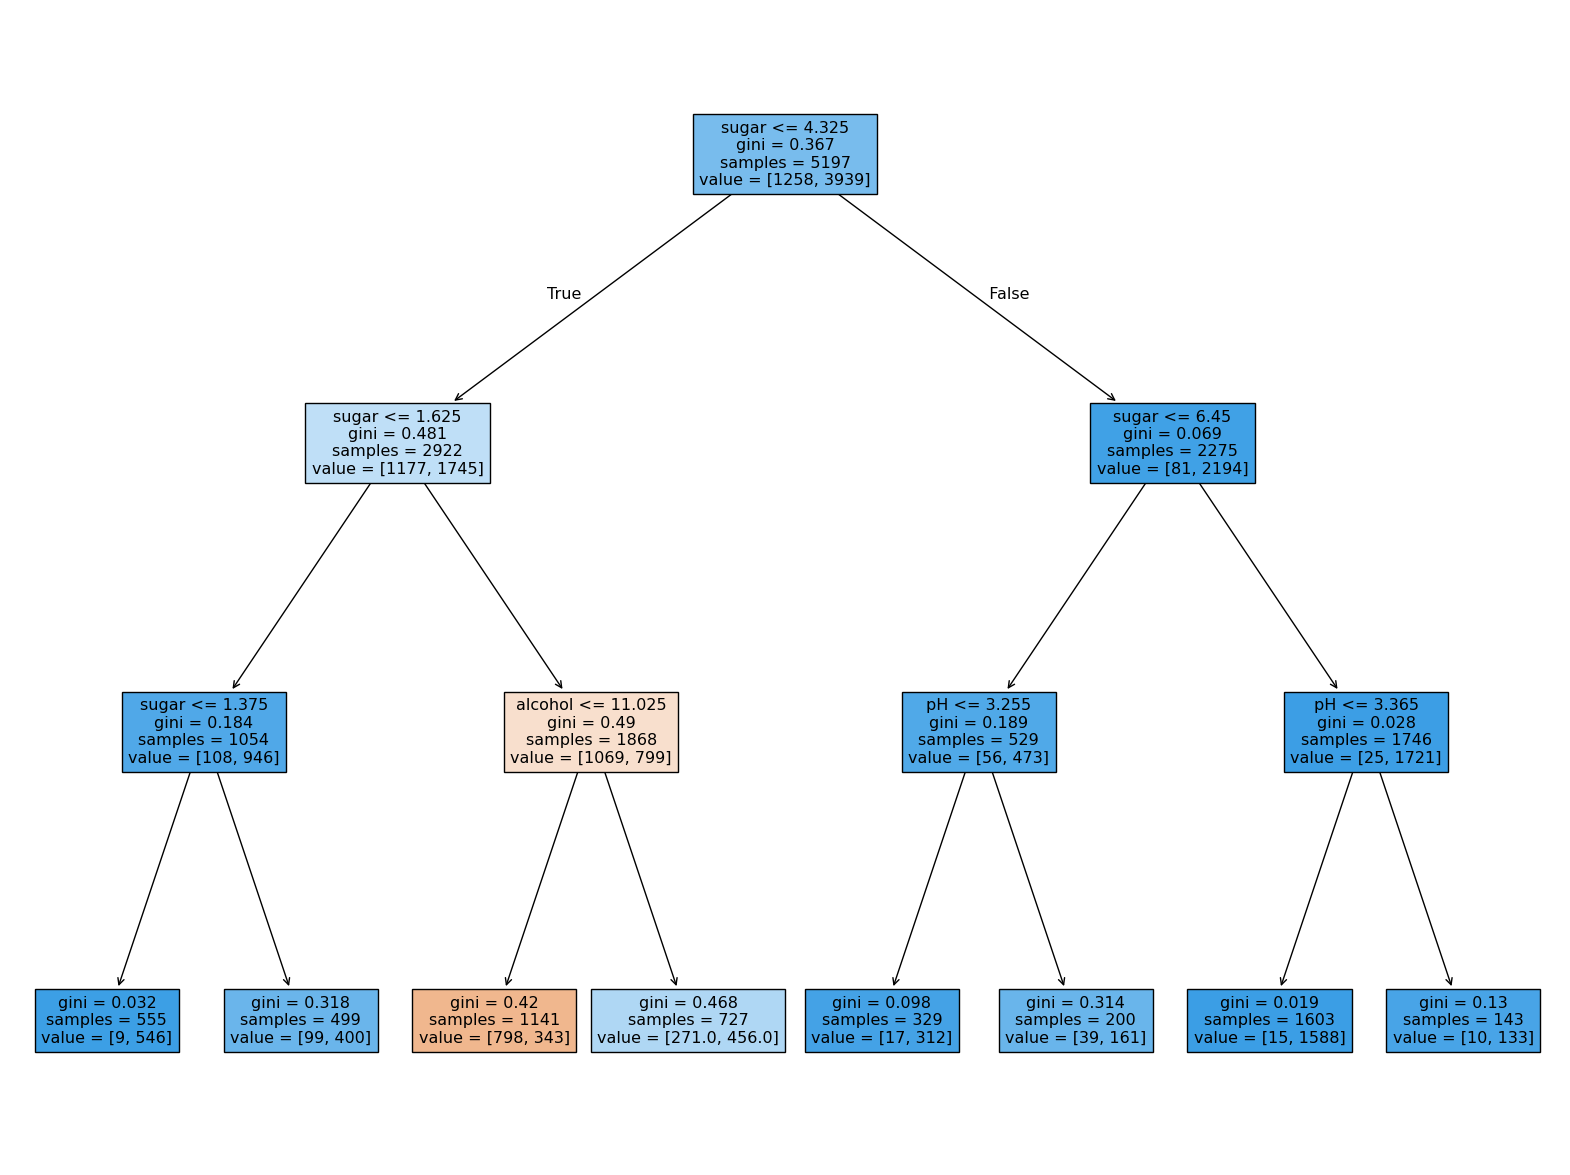

In [28]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [29]:
# 결과
# 1.625 < 당도 < 4.325 && 알콜도수 <= 11.025
# -> 레드와인(주활색), 나머지는 화이트와인!

# 결정트리는 어떤 특성이 가장 유용했는지 나타내는 특성 중요도를 계산해줌
print(dt.feature_importances_) # 총합 : 1
# 알콜도수, 당도, pH

[0.12345626 0.86862934 0.0079144 ]


In [30]:
# 좌우가 균일하지 않은 트리
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005,random_state=42)

# 최소 불순도 (min_impurity_decrease)
dt.fit(train_input,train_target) # 표준점수화 X

print(dt.score(train_input,train_target)) # 88.74%
print(dt.score(test_input,test_target))   # 86.15%

0.8874350586877044
0.8615384615384616


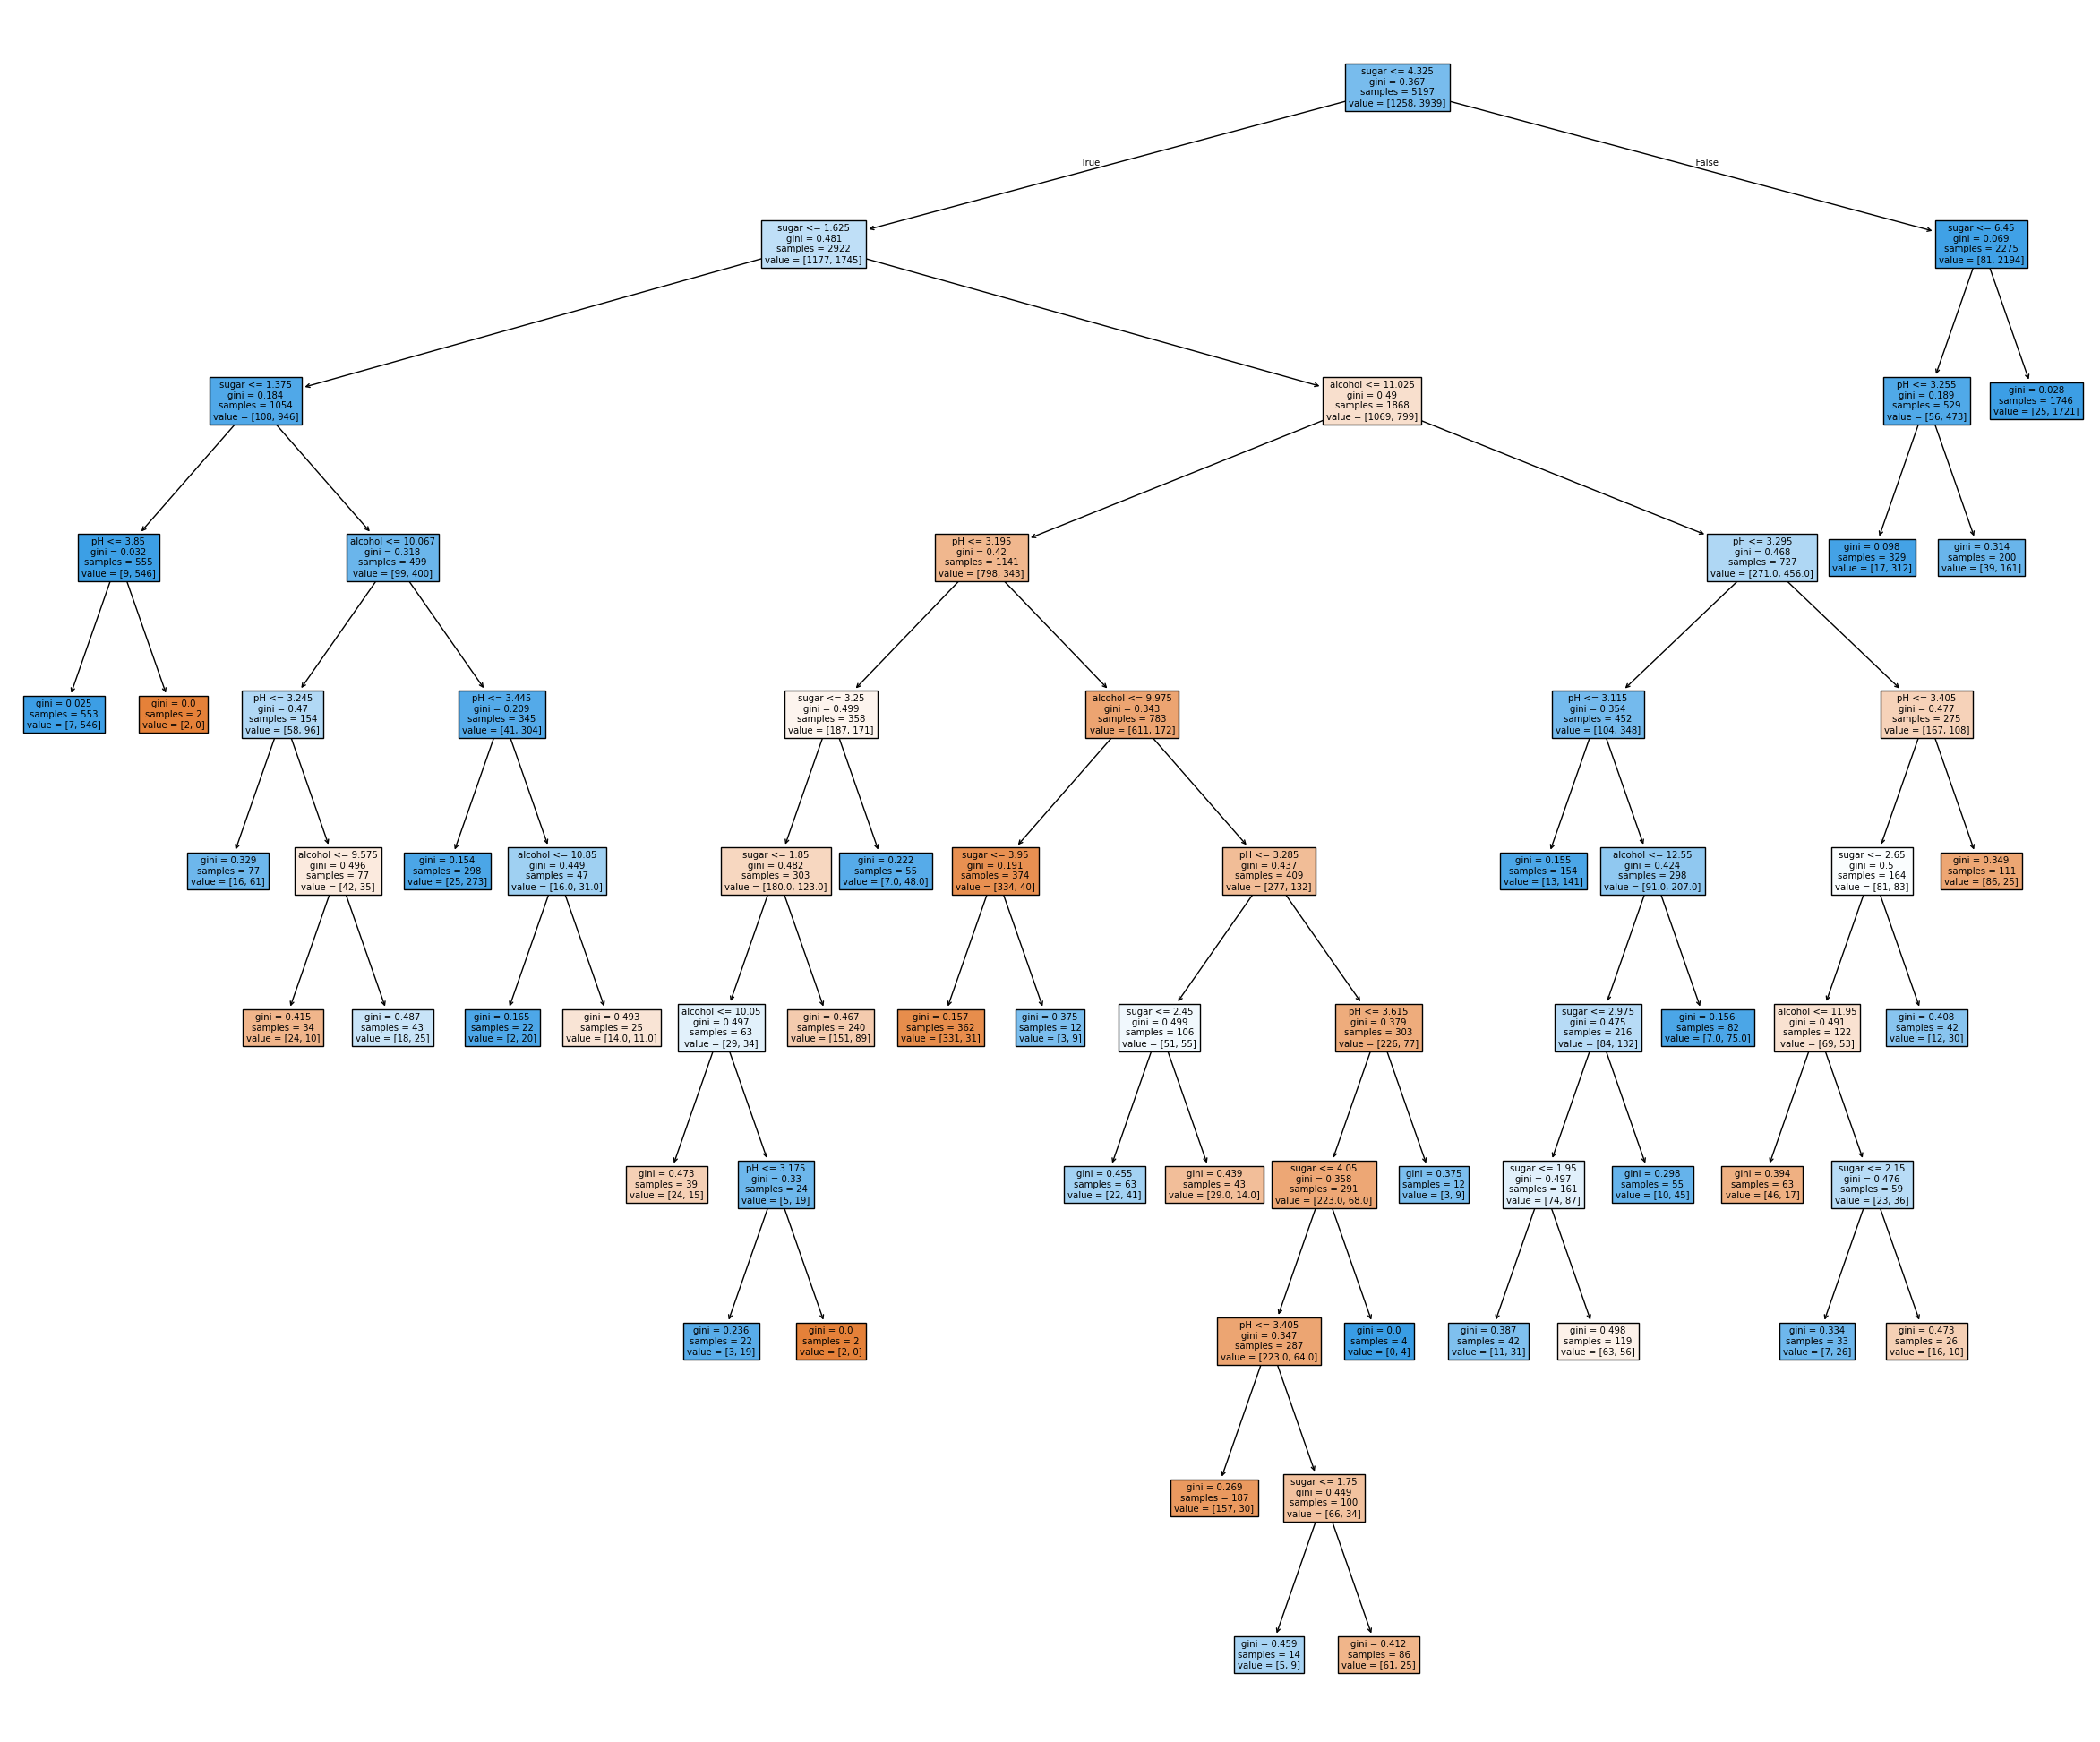

In [31]:
plt.figure(figsize=(30,25))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()